In [1]:
import pandas as pd

## Definir carpeta de salida

In [2]:
ruta_base = r"C:\Users\smp\OneDrive - Grupo JJChicolino\THE POWER\PROYECTOFINALEDA\data\output"

## Cargar datasets limpios

In [4]:
df2 = pd.read_csv(ruta_base + r"\ventas2024_limpio.csv")       # ventas
df3 = pd.read_excel(ruta_base + r"\presupuesto2024_limpio.xlsx")  # presupuesto

##  Verificar columnas

In [5]:
print("Ventas df2:", df2.columns.tolist())
print("Presupuesto df3:", df3.columns.tolist())



Ventas df2: ['codcompany', 'idcustomer', 'fecha', 'idarticle', 'quantity', 'saleamount', 'costamount', 'idpaymentmethod', 'documento', 'codcustomer', 'cliente', 'codvouchertype', 'tipoasiento', 'codproductline', 'macrofamilia', 'codproductfamily', 'familia', 'codproductsubfamily', 'subfamilia']
Presupuesto df3: ['cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila', 'familia', 'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)', 'unidades', 'mes', 'presupuesto_mes', 'month', 'year', 'month_name']


## Crear month_name en df2

In [8]:
df2['fecha'] = pd.to_datetime(df2['fecha'], dayfirst=True)

In [9]:
df2['year'] = df2['fecha'].dt.year
df2['month'] = df2['fecha'].dt.month

In [10]:
df2['month_name'] = df2['year'].astype(str) + '-' + df2['month'].astype(str).str.zfill(2)

In [11]:
df2[['fecha', 'year', 'month', 'month_name']].head()

,fecha,year,month,month_name
0,2024-04-01,2024,4,2024-04
1,2024-12-31,2024,12,2024-12
2,2024-08-09,2024,8,2024-08
3,2024-04-01,2024,4,2024-04
4,2024-02-12,2024,2,2024-02


## Unificar nombres de columnas


In [12]:
df2.rename(columns={
    'codcompany': 'cod_empresa',
    'saleamount': 'ventas_(€)',
    'quantity': 'unidades'
}, inplace=True)

In [13]:
df2[['cod_empresa', 'ventas_(€)', 'unidades', 'macrofamilia', 'familia', 'subfamilia', 'month_name']].head()

,cod_empresa,ventas_(€),unidades,macrofamilia,familia,subfamilia,month_name
0,21,2307.96,36.0,Custom Molding,Formato Verde,CINTURONES,2024-04
1,5,53.00,1.0,Maquinaria y SAT,Consumibles SAT,REPUESTOS ECONOMY BAG,2024-12
2,21,283.40,10.0,Marine,Nautica Deportiva,COMPLEMENTOS PANTALANES,2024-08
3,5,0.00,1.0,Consumo Interno,Consumo Interno y componentes,CAJAS-MATERIA PRIMA - COMPONENTES,2024-04
4,5,573.60,0.6,Envases y Embalajes,Envases Madera,CAIXAS RECTAS CLASICAS,2024-02


## Merge de df2 (ventas) con df3 (presupuesto)

In [34]:
df_final = pd.merge(
    df2,
    df3[['cod_empresa', 'subfamilia', 'presupuesto_mes']],
    how='left',  # mantener todas las ventas
    on=['cod_empresa', 'subfamilia']
)

In [35]:
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cod_empresa          4835 non-null   int64         
 1   idcustomer           4835 non-null   object        
 2   fecha                4835 non-null   datetime64[ns]
 3   idarticle            4835 non-null   object        
 4   unidades             4835 non-null   float64       
 5   ventas_(€)           4835 non-null   float64       
 6   costamount           4835 non-null   float64       
 7   idpaymentmethod      4835 non-null   object        
 8   documento            4835 non-null   object        
 9   codcustomer          4835 non-null   int64         
 10  cliente              4835 non-null   object        
 11  codvouchertype       4835 non-null   int64         
 12  tipoasiento          4835 non-null   object        
 13  codproductline       4835 non-nul

## Crear métricas adicionales
-Diferencia entre ventas y presupuesto

-Ratio ventas / presupuesto


In [36]:
df_final['dif_ventas_presupuesto'] = df_final['ventas_(€)'] - df_final['presupuesto_mes']

In [37]:
df_final['ratio_ventas_presupuesto'] = df_final['ventas_(€)'] / df_final['presupuesto_mes']

## Guardar dataset final

In [38]:
import os

In [39]:
ruta_final = r"C:\Users\smp\OneDrive - Grupo JJChicolino\THE POWER\PROYECTOFINALEDA\data\output\final"
os.makedirs(ruta_final, exist_ok=True)

In [40]:
df_final.to_csv(ruta_final + r"\df_final_para_powerbi.csv", index=False)

## Revisar columnas y tipos de datos

In [41]:
df_final.info()  # Tipos de datos y nulos
df_final.head()  # Primeras filas para ver estructura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cod_empresa               4835 non-null   int64         
 1   idcustomer                4835 non-null   object        
 2   fecha                     4835 non-null   datetime64[ns]
 3   idarticle                 4835 non-null   object        
 4   unidades                  4835 non-null   float64       
 5   ventas_(€)                4835 non-null   float64       
 6   costamount                4835 non-null   float64       
 7   idpaymentmethod           4835 non-null   object        
 8   documento                 4835 non-null   object        
 9   codcustomer               4835 non-null   int64         
 10  cliente                   4835 non-null   object        
 11  codvouchertype            4835 non-null   int64         
 12  tipoasiento         

,cod_empresa,idcustomer,fecha,idarticle,unidades,ventas_(€),costamount,idpaymentmethod,documento,codcustomer,...,codproductfamily,familia,codproductsubfamily,subfamilia,year,month,month_name,presupuesto_mes,dif_ventas_presupuesto,ratio_ventas_presupuesto
0,21,021-006150,2024-04-01,915e1ba0-a1e7-4875-9cff-5cc30e901d80,36.0,2307.96,2476.8,021-91,24A040006,6150,...,FR01A,Formato Verde,CA2,CINTURONES,2024,4,2024-04,0.082286,2307.877714,28047.970254
1,21,021-006150,2024-04-01,915e1ba0-a1e7-4875-9cff-5cc30e901d80,36.0,2307.96,2476.8,021-91,24A040006,6150,...,FR01A,Formato Verde,CA2,CINTURONES,2024,4,2024-04,0.083647,2307.876353,27591.567108
2,21,021-006150,2024-04-01,915e1ba0-a1e7-4875-9cff-5cc30e901d80,36.0,2307.96,2476.8,021-91,24A040006,6150,...,FR01A,Formato Verde,CA2,CINTURONES,2024,4,2024-04,0.076988,2307.883012,29978.011837
3,21,021-006150,2024-04-01,915e1ba0-a1e7-4875-9cff-5cc30e901d80,36.0,2307.96,2476.8,021-91,24A040006,6150,...,FR01A,Formato Verde,CA2,CINTURONES,2024,4,2024-04,0.070868,2307.889132,32566.862886
4,21,021-006150,2024-04-01,915e1ba0-a1e7-4875-9cff-5cc30e901d80,36.0,2307.96,2476.8,021-91,24A040006,6150,...,FR01A,Formato Verde,CA2,CINTURONES,2024,4,2024-04,0.070183,2307.889817,32884.960535


## Comprobar valores nulos por columna

In [42]:
nulos = df_final.isnull().sum()
print(nulos[nulos > 0])  # Solo mostrar columnas con nulos

presupuesto_mes             23
dif_ventas_presupuesto      23
ratio_ventas_presupuesto    23
dtype: int64


## Comprobar duplicados

In [43]:
duplicados = df_final.duplicated(subset=['cod_empresa', 'idarticle', 'fecha'])
print("Número de duplicados:", duplicados.sum())

Número de duplicados: 4640


## Estadísticas descriptivas de las columnas numéricas

In [44]:
df_final.describe()

,cod_empresa,fecha,unidades,ventas_(€),costamount,codcustomer,codvouchertype,year,month,presupuesto_mes,dif_ventas_presupuesto,ratio_ventas_presupuesto
count,4835.000000,4835,4835.000000,4835.000000,4835.000000,4835.000000,4835.000000,4835.0,4835.000000,4812.000000,4812.000000,4.812000e+03
mean,10.046536,2024-07-18 03:10:54.477766400,33.857221,1148.451582,948.519021,5698.590900,10.221510,2024.0,6.954912,0.083333,1155.163549,2.074411e+04
min,1.000000,2024-01-05 00:00:00,-133.000000,-8379.000000,-8379.000000,376.000000,10.000000,2024.0,1.000000,0.001385,-194.171418,-7.748210e+03
25%,5.000000,2024-04-15 00:00:00,1.000000,0.000000,2.393780,3623.000000,10.000000,2024.0,4.000000,0.056348,-0.045145,0.000000e+00
50%,5.000000,2024-08-01 00:00:00,1.250000,63.100000,31.619160,6195.000000,10.000000,2024.0,8.000000,0.082108,62.977873,9.433370e+02
75%,21.000000,2024-10-10 00:00:00,5.000000,304.820000,164.860000,7730.000000,10.000000,2024.0,10.000000,0.089300,304.742349,4.808249e+03
max,21.000000,2024-12-31 00:00:00,6111.000000,69152.990000,69152.990000,8777.000000,30.000000,2024.0,12.000000,0.742626,69152.906667,9.803887e+06
std,7.968501,NaN,311.383513,5840.261173,5566.346836,2312.025146,1.445304,0.0,3.495910,0.059042,5852.149385,1.781187e+05


## Estadísticas de columnas categóricas

In [45]:
df_final['macrofamilia'].value_counts()
df_final['familia'].value_counts()
df_final['subfamilia'].value_counts()

subfamilia
ARTICULOS SIN CONTROL DE STOCK          948
SERVICIOS VARIOS SAT                    600
CONSUMIBLES BINS                        252
CAIXAS RECTAS CLASICAS                  252
SACOS                                   240
                                       ... 
NATURLINE                                 1
PROD, RODEAR RED TUBULAR (NO PROPIO)      1
TRENCILLA POLIESTER H,T,                  1
PROD, COMPL,: FLEJES Y GOMAS              1
REPUESTOS GRAP, NEUMATICA AN-1            1
Name: count, Length: 63, dtype: int64

## Distribución de las métricas clave

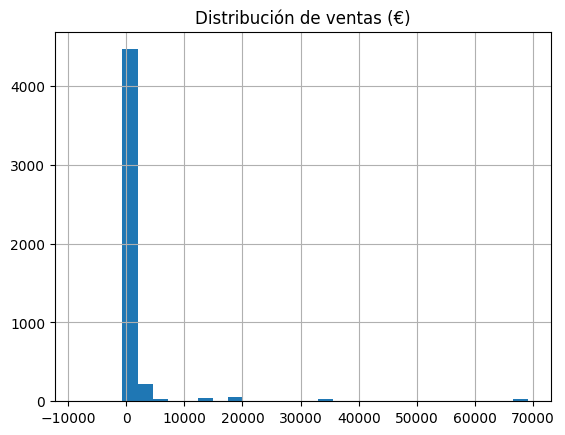

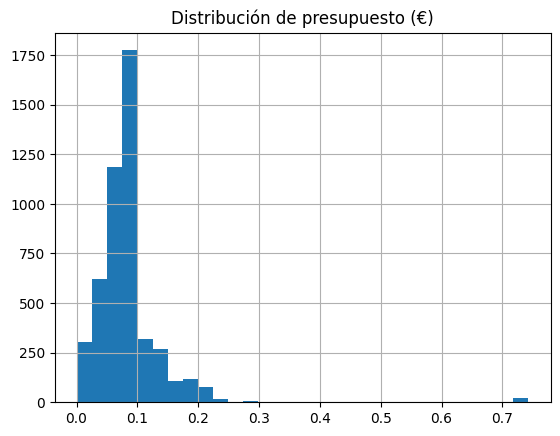

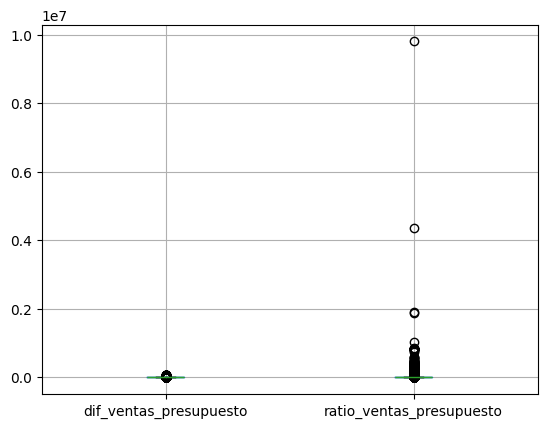

In [46]:
import matplotlib.pyplot as plt

# Histograma de ventas
df_final['ventas_(€)'].hist(bins=30)
plt.title('Distribución de ventas (€)')
plt.show()

# Histograma de presupuesto
df_final['presupuesto_mes'].hist(bins=30)
plt.title('Distribución de presupuesto (€)')
plt.show()

# Boxplot para ver outliers
df_final[['dif_ventas_presupuesto', 'ratio_ventas_presupuesto']].boxplot()
plt.show()

## Guardar df_final limpio

In [47]:
ruta_final = r"C:\Users\smp\OneDrive - Grupo JJChicolino\THE POWER\PROYECTOFINALEDA\data\output\final"
os.makedirs(ruta_final, exist_ok=True)

In [48]:
df_final.to_csv(os.path.join(ruta_final, "df_final_para_powerbi.csv"), index=False)

print("✅ Archivo guardado correctamente en:", ruta_final)

✅ Archivo guardado correctamente en: C:\Users\smp\OneDrive - Grupo JJChicolino\THE POWER\PROYECTOFINALEDA\data\output\final


In [49]:
df_final.to_excel(os.path.join(ruta_final, "df_final_para_powerbi.xlsx"), index=False)